In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
!pip3 install nltk
import nltk
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv("./gold_output.csv")

stopword = set(STOPWORDS)
for word in stopwords.words('english'):
    stopword.add(word)

In [3]:
def word_cloud(df):

    comment_words = ''

    for idx, row in df.iterrows():

        val = row['tweet']

        # typecaste each val to string
        val = str(val)

        val = re.sub('<EMOJI[\S]*>', '', val)
        val = re.sub('<USER>', '', val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
            tokens[i] = re.sub(r'\W+', '', tokens[i])

        comment_words += " ".join(tokens)+" "  

    comment_words = comment_words.split(' ') 
    comment_words = [word for word in comment_words if word not in stopword]    

#     WNL = nltk.WordNetLemmatizer()
#     comment_words = [WNL.lemmatize(t) for t in comment_words]

    # nltk.FreqDist generates a tally of the number of times each word appears
    # and stores the results in a special dictionary.
    fdist = nltk.FreqDist(comment_words)

    # This is the dictionary we'll use for the word cloud.
    # Loaded with the FOR loop below.
    word_dict = {}

    for key in fdist:
        #DEBUG: print ("'%s' occurred %s times" % (key, fdist[key]))
        word_dict[key] = fdist[key]    

    if '' in word_dict:
        del word_dict['']


    wordcloud = WordCloud(background_color ='black',
                    stopwords = stopword,
                    min_font_size = 10).generate_from_frequencies(word_dict)

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

Positive


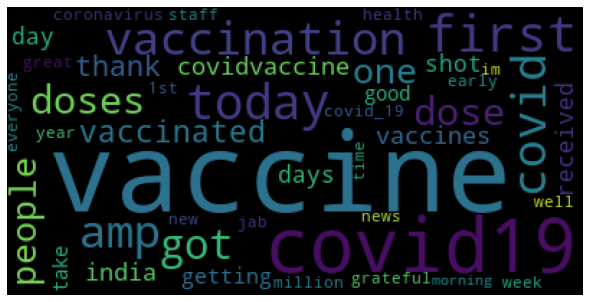

Negative


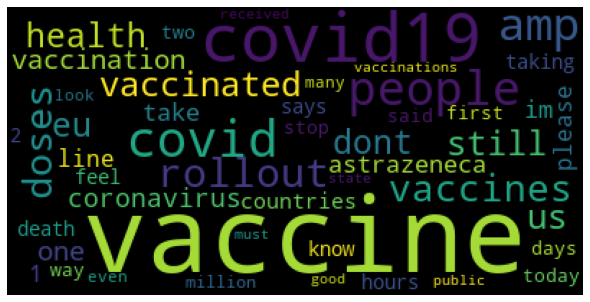

In [4]:
print('Positive')
word_cloud(df[df['true_value']=='POSITIVE'])
print('Negative')
word_cloud(df[df['true_value']=='NEGATIVE'])